In [12]:
import pandas as pd
from Main import Graph
from Connect import Neo4jConnection
import networkx as nx
import matplotlib.pyplot as plt

In [13]:
neo4j_conn = Neo4jConnection(
    uri="bolt+ssc://ef6a4b43.databases.neo4j.io",
    user="neo4j",
    pwd="NGc-axA6NfD4lLYYgOS6EuxlNK-Fi8MrV41-bQep68I"
)

In [14]:
graph = Graph(neo4j_conn=neo4j_conn)
for v in ['A', 'B', 'C', 'D', 'E']:
    graph.add_vertex(v)

In [15]:
edges = [
    ('A', 'B', 4),
    ('A', 'C', 1),
    ('C', 'B', 2),
    ('B', 'D', 5),
    ('C', 'D', 8),
    ('D', 'E', 6)
]

In [16]:
for from_data, to_data, weight in edges:
    graph.add_edge(from_data, to_data, weight)

In [17]:
graph.save_graph_to_neo4j()

In [18]:
df_result = graph.dijkstra('A')
df_result

,Current Node,Visited Nodes,Distances
0,A,[A],"{'A': 0, 'B': 4, 'C': 1, 'D': inf, 'E': inf}"
1,C,"[A, C]","{'A': 0, 'B': 3, 'C': 1, 'D': 9, 'E': inf}"
2,B,"[A, B, C]","{'A': 0, 'B': 3, 'C': 1, 'D': 8, 'E': inf}"
3,D,"[A, B, C, D]","{'A': 0, 'B': 3, 'C': 1, 'D': 8, 'E': 14}"
4,E,"[A, B, C, D, E]","{'A': 0, 'B': 3, 'C': 1, 'D': 8, 'E': 14}"


In [19]:
# Tìm đường đi ngắn nhất từ A đến E
path = []
current_vertex = graph.vertices['E']
while current_vertex:
    path.insert(0, current_vertex.data)
    current_vertex = current_vertex.previous

# Lưu đường đi ngắn nhất vào Neo4j
graph.save_shortest_path_to_neo4j(path)

# Xây dựng danh sách các cạnh của đường đi ngắn nhất
shortest_path_edges = []
for i in range(len(path) - 1):
    shortest_path_edges.append((path[i], path[i+1]))

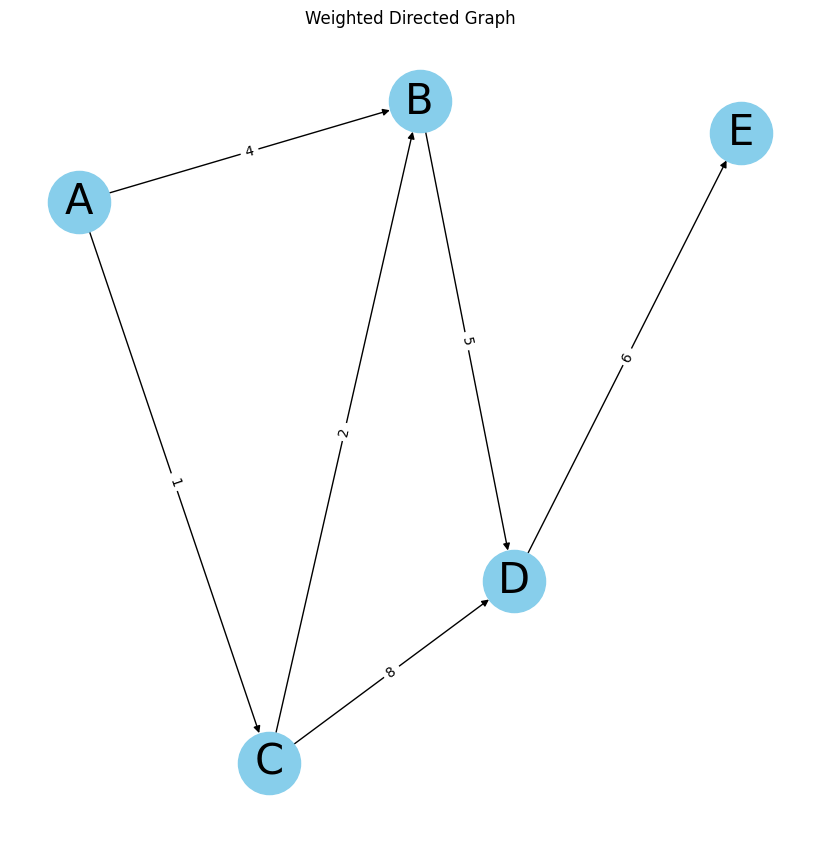

In [20]:
# Vẽ đồ thị ban đầu
plt.figure(figsize=(8, 8))
G = nx.DiGraph()
G.add_weighted_edges_from(edges)

# Vị trí các nút trong đồ thị
pos = nx.spring_layout(G)

# Vẽ nút và cạnh của đồ thị ban đầu
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=30)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))

# Tiêu đề đồ thị ban đầu
plt.title("Weighted Directed Graph")
plt.show()

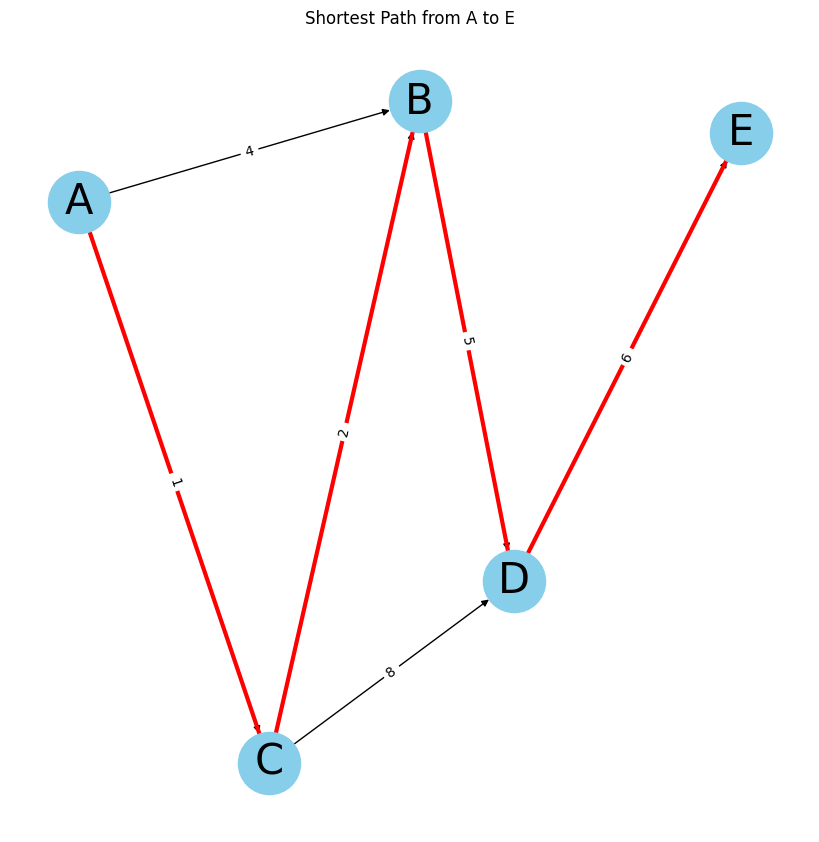

Shortest path from A to E: A -> C -> B -> D -> E


In [21]:
# Vẽ lại đồ thị với đường đi ngắn nhất nổi bật
plt.figure(figsize=(8, 8))

# Vẽ nút và cạnh của đồ thị
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=30)

# Vẽ các cạnh của đường đi ngắn nhất với màu sắc khác
nx.draw_networkx_edges(G, pos, edgelist=shortest_path_edges, edge_color='r', width=3)

# Vẽ nhãn cạnh
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))

# Tiêu đề đồ thị với đường đi ngắn nhất
plt.title("Shortest Path from A to E")
plt.show()

# In ra đường đi ngắn nhất
print("Shortest path from A to E:", " -> ".join(path))

             Step Current Vertex  \
0   Initial State              A   
1          Move 1              A   
2          Move 2              B   
3          Move 3              C   
4          Move 4              D   
5          Move 5              E   
6          Move 6              A   
7          Move 7              C   
8          Move 8              E   
9          Move 9              B   
10        Move 10              D   
11    Final State              A   

                                      Remaining Edges  \
0   {'A': ['B', 'E', 'C', 'D'], 'B': ['A', 'C', 'E...   
1   {'A': ['E', 'C', 'D'], 'B': ['C', 'E', 'D'], '...   
2   {'A': ['E', 'C', 'D'], 'B': ['E', 'D'], 'C': [...   
3   {'A': ['E', 'C', 'D'], 'B': ['E', 'D'], 'C': [...   
4   {'A': ['E', 'C', 'D'], 'B': ['E', 'D'], 'C': [...   
5   {'A': ['C', 'D'], 'B': ['E', 'D'], 'C': ['A', ...   
6   {'A': ['D'], 'B': ['E', 'D'], 'C': ['E'], 'D':...   
7   {'A': ['D'], 'B': ['E', 'D'], 'C': [], 'D': ['...   
8   {'A': ['D'], '

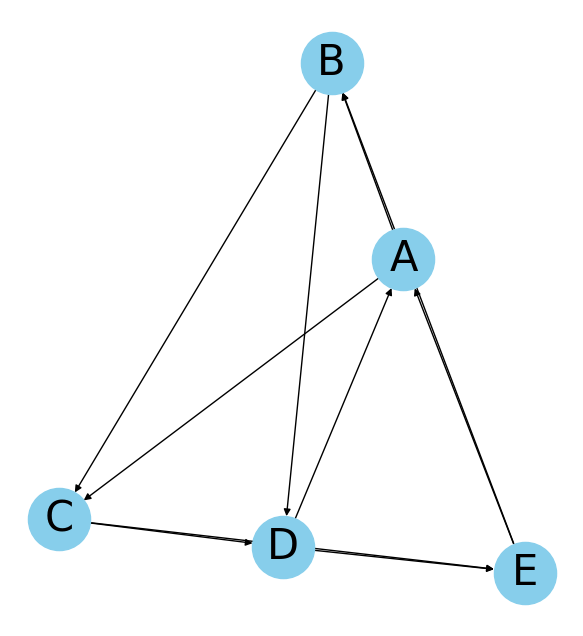

Euler Circuit with order: ('A', 'B') -(1)-> ('B', 'C') -(2)-> ('C', 'D') -(3)-> ('D', 'E') -(4)-> ('E', 'A') -(5)-> ('A', 'C') -(6)-> ('C', 'E') -(7)-> ('E', 'B') -(8)-> ('B', 'D') -(9)-> ('D', 'A') -(10)-> ('A', 'B')


In [27]:
euler_graph = Graph(neo4j_conn=neo4j_conn)
for v in ['A', 'B', 'C', 'D', 'E']:
    euler_graph.add_vertex(v)

euler_edges = [
    ('A', 'B', 1),
    ('B', 'C', 1),
    ('C', 'D', 1),
    ('D', 'E', 1),
    ('E', 'A', 1),
    ('A', 'C', 1),
    ('C', 'E', 1),
    ('E', 'B', 1),
    ('B', 'D', 1),
    ('D', 'A', 1)
]
for edge in euler_edges:
    euler_graph.add_edge(*edge)
# Tìm chu trình Euler và lưu các bước
result_df = euler_graph.fleury_algorithm()
print(result_df)
# Lấy chu trình cuối cùng từ DataFrame
final_circuit = eval(result_df.iloc[-1]['Circuit'])
# Lưu vào Neo4j
euler_graph.save_euler_cycle(final_circuit)

# Visualize Euler Circuit
plt.figure(figsize=(16, 8))

# Original graph
plt.subplot(121)
G_euler = nx.DiGraph()
G_euler.add_nodes_from(['A', 'B', 'C', 'D', 'E'])
G_euler.add_weighted_edges_from(euler_edges)
pos_euler = nx.spring_layout(G_euler)

try:
    # Vẽ đồ thị gốc
    nx.draw(G_euler, pos_euler, with_labels=True, 
            node_color='skyblue', node_size=2000, font_size=30)
    nx.draw_networkx_edge_labels(G_euler, pos_euler, 
                               edge_labels=nx.get_edge_attributes(G_euler, 'weight'))
    plt.title("Original Graph")

    # Euler Circuit
    plt.subplot(122)
    if isinstance(result_df, pd.DataFrame):
        final_circuit = eval(result_df.iloc[-1]['Circuit'])
        
        # Tạo đồ thị mới cho chu trình Euler
        G_euler_circuit = nx.DiGraph()
        G_euler_circuit.add_nodes_from(['A', 'B', 'C', 'D', 'E'])
        G_euler_circuit.add_weighted_edges_from(euler_edges)
        
        # Vẽ đồ thị gốc
        nx.draw(G_euler_circuit, pos_euler, with_labels=True, 
                node_color='skyblue', node_size=2000, font_size=30)
        
        # Dictionary để lưu nhãn cạnh với số thứ tự
        edge_labels = {}
        
        # Vẽ chu trình Euler và thêm số thứ tự
        for i in range(len(final_circuit)-1):
            try:
                current_edge = (final_circuit[i], final_circuit[i+1])
                nx.draw_networkx_edges(G_euler_circuit, pos_euler,
                                     edgelist=[current_edge],
                                     edge_color='r', width=2)
                # Thêm số thứ tự vào nhãn cạnh
                edge_labels[current_edge] = f'{i+1}'
            except KeyError:
                continue
                
        # Vẽ và đánh số cạnh cuối nối về đỉnh đầu
        try:
            last_edge = (final_circuit[-1], final_circuit[0])
            nx.draw_networkx_edges(G_euler_circuit, pos_euler,
                                 edgelist=[last_edge],
                                 edge_color='r', width=2)
            edge_labels[last_edge] = f'{len(final_circuit)}'
        except KeyError:
            pass
        
        # Vẽ nhãn số thứ tự cho các cạnh
        nx.draw_networkx_edge_labels(G_euler_circuit, pos_euler, 
                                   edge_labels=edge_labels)
        
        plt.title("Euler Circuit")
except Exception as e:
    print(f"Có lỗi xảy ra khi vẽ đồ thị: {str(e)}")

plt.show()

# In ra chu trình Euler với số thứ tự
if isinstance(result_df, pd.DataFrame):
    circuit_with_order = []
    for i in range(len(final_circuit)):
        if i < len(final_circuit) - 1:
            circuit_with_order.append(f"{final_circuit[i]} -({i+1})-> ")
        else:
            circuit_with_order.append(f"{final_circuit[i]} -({len(final_circuit)})-> {final_circuit[0]}")
    print("Euler Circuit with order:", "".join(circuit_with_order))




Hamiltonian Path Result:
  Current Vertex    Visited Nodes     Current Path
0              A              [A]              [A]
1              B           [A, B]           [A, B]
2              C        [A, B, C]        [A, B, C]
3              D     [A, B, D, C]     [A, B, C, D]
4              E  [A, C, B, D, E]  [A, B, C, D, E]


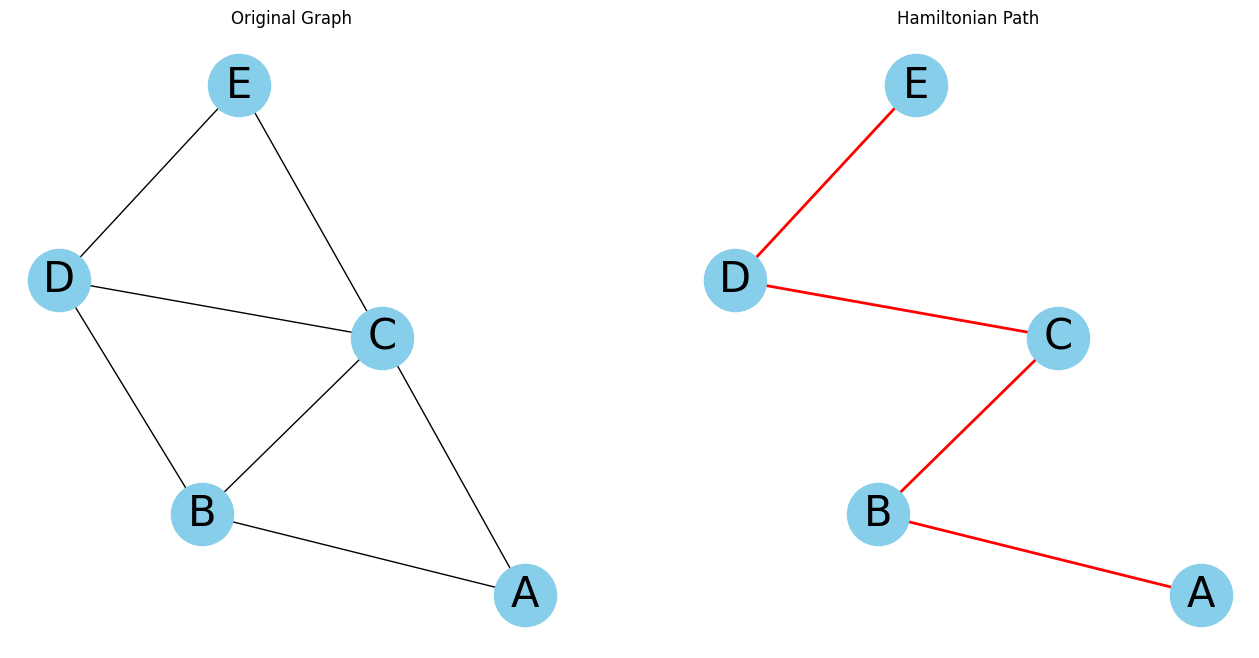

In [12]:
# 2. Hamiltonian Path Demonstration
hamilton_graph = Graph(neo4j_conn=neo4j_conn)
for v in ['A', 'B', 'C', 'D', 'E']:
    hamilton_graph.add_vertex(v)

hamilton_edges = [
    ('A', 'B', 1),
    ('B', 'C', 1),
    ('C', 'D', 1),
    ('D', 'E', 1),
    ('A', 'C', 1),
    ('B', 'D', 1),
    ('C', 'E', 1)
]

for from_data, to_data, weight in hamilton_edges:
    hamilton_graph.add_edge(from_data, to_data, weight)

# Save Hamilton graph to Neo4j
hamilton_graph.save_graph_to_neo4j()

# Find Hamiltonian Path
hamilton_result = hamilton_graph.hamiltonian_path()
print("\nHamiltonian Path Result:")
print(hamilton_result)

# Visualize Hamilton graph and path
plt.figure(figsize=(16, 8))

# Original graph
plt.subplot(121)
G_hamilton = nx.Graph()
G_hamilton.add_weighted_edges_from(hamilton_edges)
pos_hamilton = nx.spring_layout(G_hamilton)
nx.draw(G_hamilton, pos_hamilton, with_labels=True, 
        node_color='skyblue', node_size=2000, font_size=30)
plt.title("Original Graph")

# Hamiltonian Path
plt.subplot(122)
if isinstance(hamilton_result, pd.DataFrame):
    final_path = hamilton_result.iloc[-1]['Current Path']
    hamilton_path_edges = [(final_path[i], final_path[i+1]) 
                          for i in range(len(final_path)-1)]
    
    G_hamilton_path = nx.Graph()
    G_hamilton_path.add_edges_from(hamilton_path_edges)
    nx.draw(G_hamilton_path, pos_hamilton, with_labels=True, 
            node_color='skyblue', node_size=2000, font_size=30,
            edge_color='r', width=2, arrows=True)
    plt.title("Hamiltonian Path")

plt.show()

             Step Current Vertex  \
0   Initial State              A   
1          Move 1              A   
2          Move 2              B   
3          Move 3              C   
4          Move 4              D   
5          Move 5              E   
6          Move 6              A   
7          Move 7              C   
8          Move 8              E   
9          Move 9              B   
10        Move 10              D   
11    Final State              A   

                                      Remaining Edges  \
0   {'A': ['B', 'E', 'C', 'D'], 'B': ['A', 'C', 'E...   
1   {'A': ['E', 'C', 'D'], 'B': ['C', 'E', 'D'], '...   
2   {'A': ['E', 'C', 'D'], 'B': ['E', 'D'], 'C': [...   
3   {'A': ['E', 'C', 'D'], 'B': ['E', 'D'], 'C': [...   
4   {'A': ['E', 'C', 'D'], 'B': ['E', 'D'], 'C': [...   
5   {'A': ['C', 'D'], 'B': ['E', 'D'], 'C': ['A', ...   
6   {'A': ['D'], 'B': ['E', 'D'], 'C': ['E'], 'D':...   
7   {'A': ['D'], 'B': ['E', 'D'], 'C': [], 'D': ['...   
8   {'A': ['D'], '

KeyError: ('A', 'B')

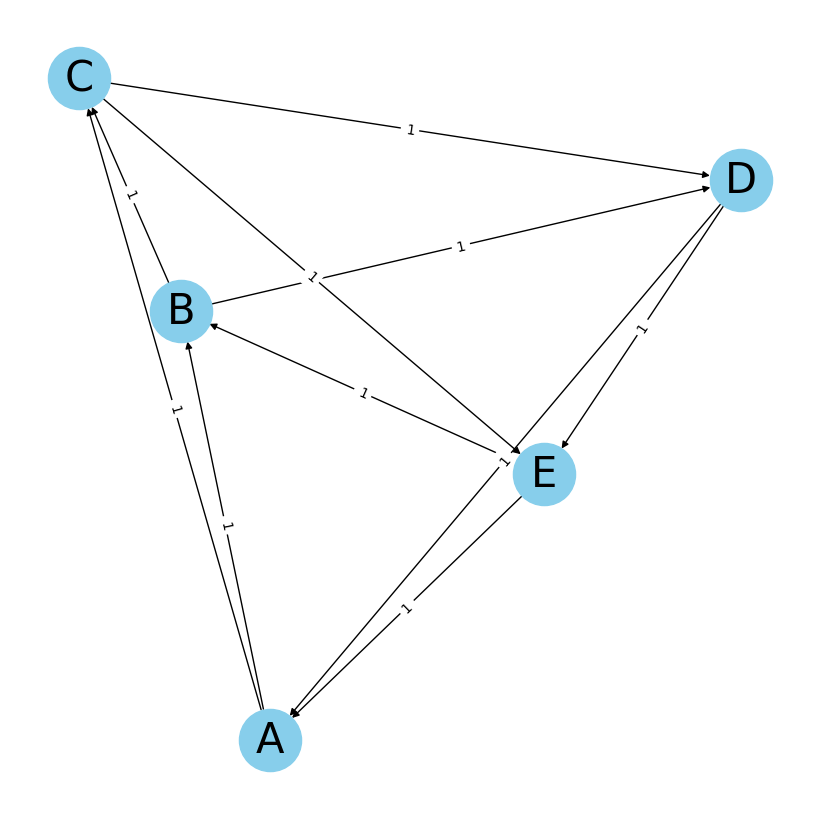

In [ ]:
euler_graph = Graph(neo4j_conn=neo4j_conn)
for v in ['A', 'B', 'C', 'D', 'E']:
    euler_graph.add_vertex(v)

euler_edges = [
    ('A', 'B', 1),
    ('B', 'C', 1),
    ('C', 'D', 1),
    ('D', 'E', 1),
    ('E', 'A', 1),
    ('A', 'C', 1),
    ('C', 'E', 1),
    ('E', 'B', 1),
    ('B', 'D', 1),
    ('D', 'A', 1)
]
for edge in euler_edges:
    euler_graph.add_edge(*edge)
# Tìm chu trình Euler và lưu các bước
result_df = euler_graph.fleury_algorithm()
print(result_df)
# Lấy chu trình cuối cùng từ DataFrame
final_circuit = eval(result_df.iloc[-1]['Circuit'])
# Lưu vào Neo4j
euler_graph.save_euler_cycle(final_circuit)

# Visualize Euler Circuit
if isinstance(result_df, pd.DataFrame):
    # Get the final circuit
    final_circuit = eval(result_df.iloc[-1]['Circuit'])
    
    # Create edges from the circuit
    euler_path_edges = [(final_circuit[i], final_circuit[i+1]) for i in range(len(final_circuit)-1)]
    
    # Add the final edge to complete the circuit
    euler_path_edges.append((final_circuit[-1], final_circuit[0]))
    
    plt.figure(figsize=(8, 8))
    G = nx.DiGraph()
    G.add_weighted_edges_from(euler_edges)
    pos = nx.spring_layout(G)
    
    # Draw original graph
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=30)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))
    
    # Highlight Euler circuit
    nx.draw_networkx_edges(G, pos, edgelist=euler_path_edges, edge_color='r', width=3)
    
    plt.title("Euler Circuit")
    plt.show()
    
    # Print the Euler circuit
    print("Euler Circuit:", " -> ".join(final_circuit + [final_circuit[0]]))



Prim's Algorithm Steps:
  Current Vertex  Current Distance       Visited Nodes  \
0              A                 0                 [A]   
1              B                 1              [A, B]   
2              C                 2           [A, B, C]   
3              D                 4        [A, B, C, D]   
4              E                 6     [A, B, C, D, E]   
5              F                 7  [A, B, C, D, E, F]   

                                        Current Tree  
0                                                 []  
1                                        [(A, B, 1)]  
2                             [(A, B, 1), (A, C, 2)]  
3                  [(A, B, 1), (A, C, 2), (B, D, 4)]  
4       [(A, B, 1), (A, C, 2), (B, D, 4), (C, E, 6)]  
5  [(A, B, 1), (A, C, 2), (B, D, 4), (C, E, 6), (...  

Kruskal's Algorithm Result:
[('A', 'B', 1), ('A', 'C', 2), ('B', 'D', 4), ('C', 'E', 6), ('D', 'F', 7)]


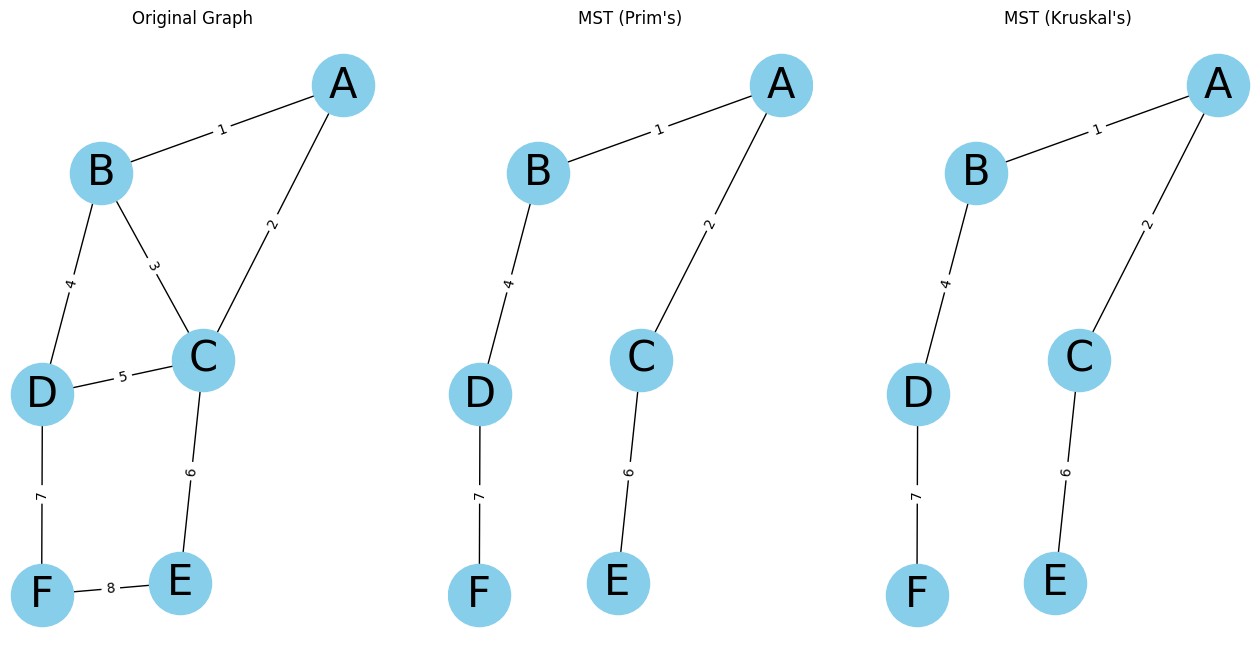


Total weight of Prim's MST: 20
Total weight of Kruskal's MST: 20


In [15]:
# **Phần 4: Tìm cây khung nhỏ nhất**
# Create the graph
graph = Graph(neo4j_conn=neo4j_conn)
for v in ['A', 'B', 'C', 'D', 'E', 'F']:
    graph.add_vertex(v)

edges = [
    ("A", "B", 1), ("A", "C", 2), ("B", "C", 3), ("B", "D", 4), 
    ("C", "D", 5), ("C", "E", 6), ("D", "F", 7), ("E", "F", 8)
]

for from_data, to_data, weight in edges:
    graph.add_edge(from_data, to_data, weight)

# Save graph to Neo4j
graph.save_graph_to_neo4j()

# Find MST using Prim's Algorithm
prim_result = graph.prim_algorithm()
print("\nPrim's Algorithm Steps:")
print(prim_result)

# Find MST using Kruskal's Algorithm
kruskal_result = graph.kruskal_algorithm()
print("\nKruskal's Algorithm Result:")
print(kruskal_result)

# Visualize the results
plt.figure(figsize=(16, 8))

# Original graph
plt.subplot(131)
G = nx.Graph()
G.add_weighted_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=30)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))
plt.title("Original Graph")

# Prim's MST
plt.subplot(132)
G_prim = nx.Graph()
if isinstance(prim_result, pd.DataFrame):
    prim_edges = []
    for _, row in prim_result.iterrows():
        if 'Current Tree' in row:
            prim_edges = row['Current Tree']
    G_prim.add_weighted_edges_from(prim_edges)
    nx.draw(G_prim, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=30)
    nx.draw_networkx_edge_labels(G_prim, pos, edge_labels=nx.get_edge_attributes(G_prim, 'weight'))
plt.title("MST (Prim's)")

# Kruskal's MST
plt.subplot(133)
G_kruskal = nx.Graph()
G_kruskal.add_weighted_edges_from(kruskal_result)
nx.draw(G_kruskal, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=30)
nx.draw_networkx_edge_labels(G_kruskal, pos, edge_labels=nx.get_edge_attributes(G_kruskal, 'weight'))
plt.title("MST (Kruskal's)")

plt.show()

# Print the total weight of both MSTs
prim_weight = sum(weight for _, _, weight in prim_edges)
kruskal_weight = sum(weight for _, _, weight in kruskal_result)
print(f"\nTotal weight of Prim's MST: {prim_weight}")
print(f"Total weight of Kruskal's MST: {kruskal_weight}")


Graph Coloring Result:
  Current Vertex Adjacent Colors  Assigned Color  \
0              A              []               1   
1              B             [1]               2   
2              C          [1, 2]               3   
3              D          [1, 2]               3   
4              E          [2, 3]               1   
5              F             [3]               1   

                                    Current Coloring  
0  {'A': 1, 'B': None, 'C': None, 'D': None, 'E':...  
1  {'A': 1, 'B': 2, 'C': None, 'D': None, 'E': No...  
2  {'A': 1, 'B': 2, 'C': 3, 'D': None, 'E': None,...  
3  {'A': 1, 'B': 2, 'C': 3, 'D': 3, 'E': None, 'F...  
4  {'A': 1, 'B': 2, 'C': 3, 'D': 3, 'E': 1, 'F': ...  
5   {'A': 1, 'B': 2, 'C': 3, 'D': 3, 'E': 1, 'F': 1}  


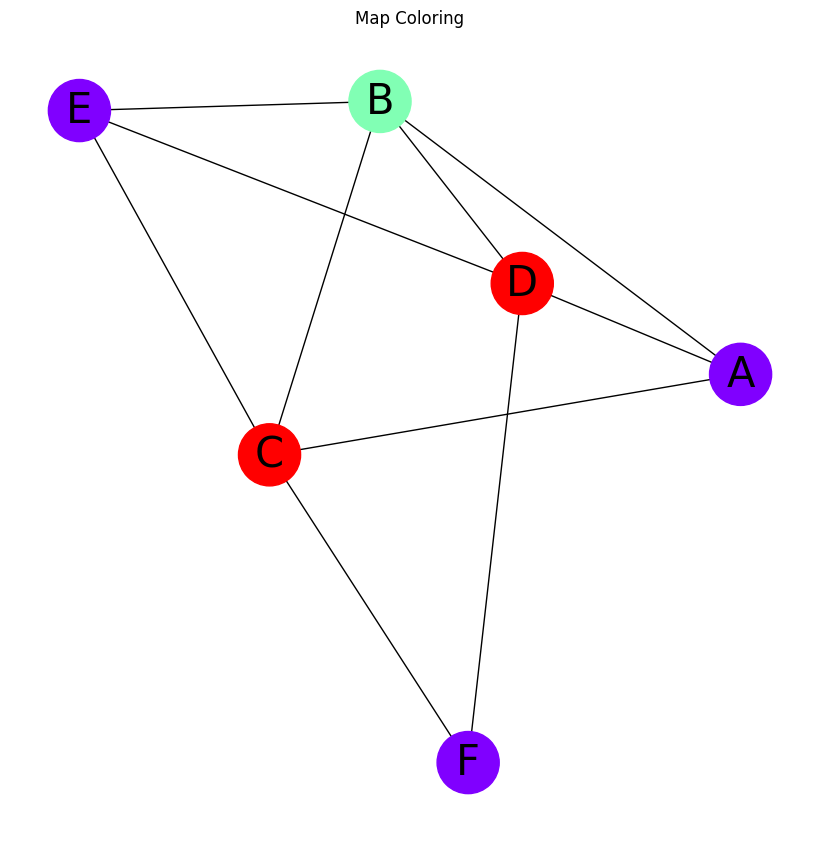


Color assignments for each region:
Region A: Color 1
Region B: Color 2
Region C: Color 3
Region D: Color 3
Region E: Color 1
Region F: Color 1


In [15]:
# **Phần 5: Tô màu đồ thị bản đồ**
# Create map graph
map_graph = Graph(neo4j_conn=neo4j_conn)
for v in ['A', 'B', 'C', 'D', 'E', 'F']:
    map_graph.add_vertex(v)

# Add edges (adjacent regions)
map_edges = [
    ("A", "B", 1), ("A", "C", 1), ("A", "D", 1),
    ("B", "C", 1), ("B", "D", 1), ("B", "E", 1),
    ("C", "E", 1), ("C", "F", 1), ("D", "E", 1),
    ("D", "F", 1)
]

for from_data, to_data, weight in map_edges:
    map_graph.add_edge(from_data, to_data, weight)

# Save map graph to Neo4j
map_graph.save_graph_to_neo4j()

# Find graph coloring
coloring_result = map_graph.graph_coloring()
print("\nGraph Coloring Result:")
print(coloring_result)

# Visualize colored graph
plt.figure(figsize=(8, 8))
G = nx.Graph()
G.add_weighted_edges_from(map_edges)
pos = nx.spring_layout(G)

# Get final coloring from the last row of the result
final_coloring = coloring_result.iloc[-1]['Current Coloring']
node_colors = [final_coloring[node] for node in G.nodes()]

# Draw the colored graph
nx.draw(G, pos, with_labels=True, 
        node_color=node_colors, 
        node_size=2000, 
        font_size=30, 
        cmap=plt.cm.rainbow)
plt.title("Map Coloring")
plt.show()

# Print the color assignments
print("\nColor assignments for each region:")
for region, color in final_coloring.items():
    print(f"Region {region}: Color {color}")
